## Introduction to Plotting Data
Congrats, you've made it to week three! This week will be awesome for those of you who are more artistically inclined, as we will be exploring different ways to visualise data. 

![Stonks](https://media.giphy.com/media/YnkMcHgNIMW4Yfmjxr/giphy.gif)

## Importing Packages
Let's go ahead and import the necessary packages. As we did last time, we'll go ahead and import NumPy and Pandas again. However, we'll also be importing **Matplotlib**. Matplotlib is a package that allows us to plot data from either NumPy or Pandas. As we'll soon see, many of the plotting techniques within Matplotlib are dead simple. Even better, we can customize our plots to our liking; we can set the color, title, labels, width, and so on for each of our plots! You may notice a new special command ``%matplotlib inline`` below where we import our packages. This is called a **magic command**, and is used to tell Jupyter Notebooks to do certain things. In this case, we're simply telling Jupyter to show our graphs below our code. 

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

%matplotlib inline

## Getting our Data
For this lesson, we'll be working with some non-scientific data: baby names. The data we'll download below includes information on the State, the Sex, the Year, the Name, and the Count of the total number of babies born with that name. Don't just take my word for it though; try checking out the first five and last five values of the dataset below. 

**NOTE:** Shoutout to the United States Social Security Administration, as well as the University of California, Berkley, for the data!

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/Sci-Teens/course-one/main/data/baby_names.csv')

In [ ]:
# TODO: Examine the first five values 


In [ ]:
# TODO: Examine the last five values


## Plotting Quantitative Data
For starters, we'll start with some of the most common plots for some of the most common data types: quantitative data. We discussed quantitative data in the last notebook, so be sure to check it out if you need a refresher.  
The plots that we'll be creating today will have two **axis**, or dimensions in which our data is arranged. The plots below have two axis, the **x-axis** and the **y-axis**. The x-axis refers to the axis that is horizontal on the plot, whereas the y-axis is vertical on the plot. The most important concept with plot axis is where to place each data. In general, **independent** data lies on the x-axis, whereas **dependent** data lies on the y-axis. We recommend you check out [this tutorial](https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-equations-and-inequalities/cc-6th-dependent-independent/a/dependent-and-independent-variables-review) or [this video](https://www.youtube.com/watch?v=l0jTMDtX4WY) on independent and dependent variables to learn more about them. 

Before we get into the bulk of the different types of plotting, we should consider the benefits of visualizing our data in the first place. Often times, as scientists, we will be working the data that a lot of the public finds boring or difficult to interpret. If we want to effectively communicate our results, we'll need to pick which visualization is the best for your data. While we won't go into the specifics of how to decide which type of plot is the best for your data, we do want to introduce you into some of the common ways you'll see data visualized.

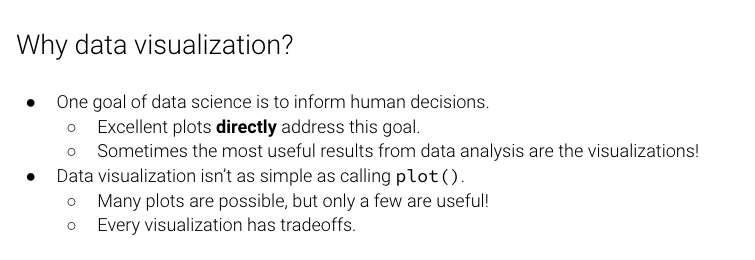

### Line Chart 
Arguably the most common plot that you'll encounter or use, a **line chart** simply plots the relationship between two variables as a collection of lines connecting points. Line charts are very useful when dealing with data collected over a time period, and we want to view how that data changes over time. For example, say we wanted to view the popularity of the name "Olivia" from 2015 to 2019 in the state of New York. We could do so using the code below.  

**Note:** Even though the *Name* column contains categorical data, we are instead plotting the *Count*, or total amount of people named Olivia between2015 and 2019. Thus, we are only plotting quantitative data. 

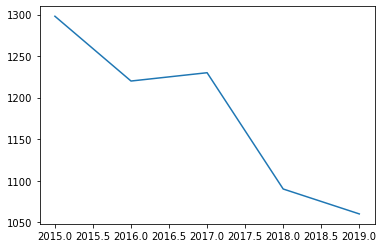

In [5]:
olivias_ny = data.loc[(data['Name'] == 'Olivia') & (data['State'] == 'NY')]
plt.plot(olivias_ny['Year'], olivias_ny['Count'])
plt.show()

### Histogram
A **histogram** tells us how much data falls into a certain range of numbers. Say we wanted to examine the frequency of all names. Think of a histogram as a collection of bar graphs whose heights are determined by how many values fall into certain **bins**. We can use a histogram instead of a line chart this time to view how the data is **distributed**. If you want to be able to look at how the data is spread out over many values, histograms are definitely the way to go. We'll go more into depth about why histograms are useful in our lesson covering statistical testing, but just know that histograms are especially useful for telling us about the general shape of our data. 

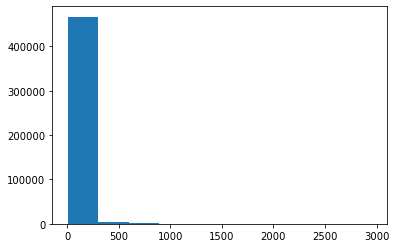

In [6]:
plt.hist(data['Count'])
plt.show()

Woah, it looks like there's only one bar on the graph. However, this isn't the case; It just so happens the more babies are named unpopular names then there are babies that are named popular names. Sound confusing? Let's check out how many babies were named with names in which less than 100 other babies were named. 

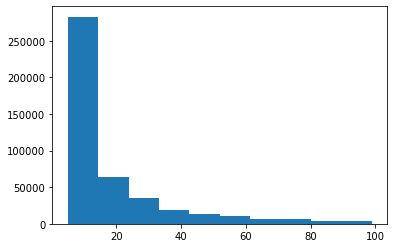

In [7]:
unique_names = data[data['Count'] < 100]
plt.hist(unique_names['Count'])
plt.show()

As you can see, there were over 250,000 babies with names that fewer than 10 other babies were also named! We can confirm this by taking the mean of the counts column for our data

In [ ]:
np.mean(data['Count'])

As you can see, on average, there were only roughly 32 other babies with the same name for any given name. Who would've thought? As we previously mentioned, we'll cover next lesson why histograms are so useful for capturing key statistical insights into our data.

## Plotting Categorical Data
Though you may not see this type of data as much as quantitative data in scientific datasets, it is nonetheless equally important to understand some of the best ways to visualize categorical data. As we mentioned for quantitative data, feel free to check out the previous notebook if you need a refresher for what categorical data is. 

### Bar Chart
A bar chart tells us how much of a categorical variable makes up a certain value. Say we wanted to plot the top fifteen girl girl names in the state of Wyoming for 2016. We could do so with the code below

In [ ]:
girls_wyoming_2016 = data.loc[(data['Year'] == 2016) & (data['State'] == 'WY') & (data['Sex'] == 'F')]
plt.bar(girls_wyoming_2016['Name'][:15], girls_wyoming_2016['Count'][:15])
plt.show()

Well, it worked (sorta...) The thing is, we can't read any of the names on the x-axis! No worries, we'll show you how to clean this up in the section "Making Plots Dope." 

### Pie Chart
A **pie chart** is useful for showing us what percentage of a total that a categorical variable makes up. We'll use the same data as above (girl names in Wyoming for the year of 2016), but this time we'll only use the top four names.

In [ ]:
plt.pie(girls_wyoming_2016['Count'][0:4], labels=girls_wyoming_2016['Name'][0:4])
plt.show()

If we were to use all of the names, we see that the plot quickly becomes unreadable, and doesn't tell us much about how less common names compare to one another since all the wedges look nearly identical

In [ ]:
plt.pie(girls_wyoming_2016['Count'], labels=girls_wyoming_2016['Name'])
plt.show()

## Making Plots Awesome 
There's one thing you may have noticed about the plots above: they all look extremely boring. And awful. There's not a whole lot going on, and the plots themselves don't tell us a lot about the data itself. What's being plotted? What does each **axis** represent? Luckily, we can easily customize these plots to make them look fire.

### Adding Labels
One of the most important things to do when plotting data is to label your plot. The plots that we've worked with so far today have had two dimensions: the **x-axis** and the **y-axis**. Going back to the first line plot that we created, we can see that there's no clear definition of what our data represents. To fix this, we'll add axis labels and a title. We can add a title using the ``.title()`` method, an x-axis label using the ``.xlabel()`` method, and a y-label using the ``.ylabel()`` method. Here's the before:

In [ ]:
olivias_ny = data.loc[(data['Name'] == 'Olivia') & (data['State'] == 'NY')]
plt.plot(olivias_ny['Year'], olivias_ny['Count'])
plt.show()

And here's the after:

In [ ]:
olivias_ny = data.loc[(data['Name'] == 'Olivia') & (data['State'] == 'NY')]
plt.plot(olivias_ny['Year'], olivias_ny['Count'])
plt.title('Olivias Born in New York Between 2015 and 2019')
plt.xlabel('Year')
plt.ylabel('Number of Olivias')
plt.show()

Looks much better already. Remember the Wyoming names data we had before? Let's try cleaning that up. For starters, we can go ahead and add a title and axis labels. We also want to rotate the names on the x-axis so that they don't overlap one another. To do this, we can use the ``.xticks()`` method, which allows us to specify how we want our "ticks to appear." in our case, we want to rotate them 90 degrees so that they appear vertical. The code to do that is provided below. Go ahead and set the title, x-axis, and y-axis yourself. 

In [ ]:
girls_wyoming_2016 = data.loc[(data['Year'] == 2016) & (data['State'] == 'WY') & (data['Sex'] == 'F')]
plt.bar(girls_wyoming_2016['Name'][:15], girls_wyoming_2016['Count'][:15])
# TODO: Add a title, as well as axis labels

plt.xticks(rotation=90)
plt.show()

Our plot is looking much better, we can actually read the names now!

### Adding Plot Styles 
As you can tell, our plots are pretty, well, boring. They let us explore our data pretty well, but they're just not that visually appealing. To fix this, we can use plot styles. To achieve this, we must use ``plt.style.use``. 

My personal favorites are the fivethirtyeight and seaborn styles. These styles are nods to two different organizations. [FiveThirtyEight](https://fivethirtyeight.com) is a website that discusses statistics for nearly every topic, especially politics, economics, and sports. Their unique style for creating plots can be used in python by calling `plt.style.use('fivethirtyeight')`. 

![Five Thirty Eight Super Bowl Plot](https://fivethirtyeight.com/wp-content/uploads/2019/01/paine-superbowlduds-1.png?w=575)

[Seaborn](https://seaborn.pydata.org/) is another Python package that is capable of creating advanced data plots. The kind of plots you can create with the Seaborn library are pretty neat, though pretty tricky if you're just starting out. Luckily, we can use their unique and appealing style without having to use the package itself by calling `plt.style.use('seaborn')`.

![Seaborn Plot](https://seaborn.pydata.org/_images/regression_marginals.png)

For a complete list of the available styles, be sure to check out [this website](https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html). We'll start by changing our plot to the seaborn style.

**Note:** when you call ``plt.style.use()``, it sets all plots created after that code to the same style as well. To stop this from occuring, just call ``plt.style.use('default')`` in a follow-up cell. 

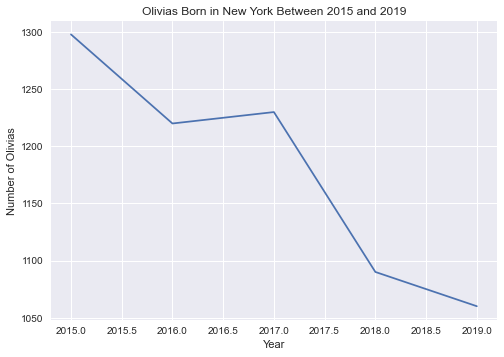

In [8]:
plt.style.use('seaborn')
olivias_ny = data.loc[(data['Name'] == 'Olivia') & (data['State'] == 'NY')]
plt.plot(olivias_ny['Year'], olivias_ny['Count'])
plt.title('Olivias Born in New York Between 2015 and 2019')
plt.xlabel('Year')
plt.ylabel('Number of Olivias')
plt.show()

Wow, our plots are already looking much better than before! What if we want to use the fivethirtyeight style? 

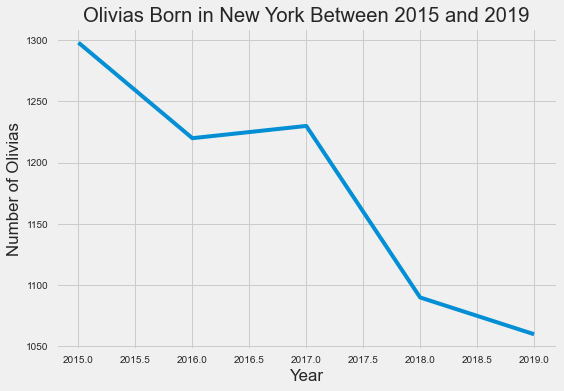

In [9]:
plt.style.use('fivethirtyeight')
olivias_ny = data.loc[(data['Name'] == 'Olivia') & (data['State'] == 'NY')]
plt.plot(olivias_ny['Year'], olivias_ny['Count'])
plt.title('Olivias Born in New York Between 2015 and 2019')
plt.xlabel('Year')
plt.ylabel('Number of Olivias')
plt.show()

How about we try this out for our girls names in Wyoming plot? Let's see if it helps. 

In [ ]:
plt.style.use('seaborn')
girls_wyoming_2016 = data.loc[(data['Year'] == 2016) & (data['State'] == 'WY') & (data['Sex'] == 'F')]
plt.bar(girls_wyoming_2016['Name'][:15], girls_wyoming_2016['Count'][:15])
plt.title('Girl Names in Wyoming for 2016')
plt.xlabel('Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

It looks good, though it seems a bit large. Let's use the ``.figure()`` method to tell matplotlib we want to make our figure bigger. Let's start by making our plot 10 inches by 10 inches. **Note** you must put the ``.figure()`` method at the top of your code, before you plot a chart, in order for it to work. 

In [ ]:
plt.figure(figsize=(5,5))

girls_wyoming_2016 = data.loc[(data['Year'] == 2016) & (data['State'] == 'WY') & (data['Sex'] == 'F')]
plt.bar(girls_wyoming_2016['Name'][:15], girls_wyoming_2016['Count'][:15])
plt.title('Girl Names in Wyoming for 2016')
plt.xlabel('Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Now, data science wouldn't be all that useful if we weren't able to capture interesting insigts into our data. Say we wanted to examine how girl names have changed between 2016 and 2019 in Wyoming. Try plotting the top fifteen girl names in Wyoming in 2019 below, and compare it to the plot above. Try and make it identical in style to the plot above. 

In [ ]:
# TODO: Plot the top fifteen girl names in Wyoming
plt.figure(figsize=(5,5))

girls_wyoming_2019 = # Find the girls names from 2019 in Wyoming 
plt.bar()
plt.show()

Great work! There are plenty of other things that we can do to style our plots. In the sake of keeping this lesson relatively simple, we'll avoid discussing these topics. If you're interested in seeing how else you can customize your plots, or what other plots you can create, be sure to check out the [matplotlib plot gallery](https://matplotlib.org/gallery/index.html) for inspiration. 

## Practice
Great job today, we definitely threw a lot of information at you. That being said, make sure to practice to perfect your Python plotting skills. For today's practice assignment, we'll give you a lot of lee-way into determining which plot you want to create. Just be sure to justify why you're using that plot in particular. For example, if your data is primarily quantitative, and you want to compare two quantitative variables, you could use a histogram. Let's start by importing our data

In [ ]:
variable_name = "Ebola Virus Outbreak" #@param ["Wildfires and Bird Migration", "Yearly Carbon Fluctuations", "Ebola Virus Outbreak"]
lessons = {
    "Ebola Virus Outbreak": "https://raw.githubusercontent.com/Sci-Teens/course-one/main/data/ebola.csv",
    "Wildfires and Bird Migration": "https://raw.githubusercontent.com/Sci-Teens/course-one/main/data/bird_counts_grsm.csv"
}

dataset = lessons[variable_name]

In [ ]:
plt.style.use('default')

data = pd.read_csv(dataset)
data.head()

**Question One** What columns of your dataset do you plan on plotting. What values from these columns will you keep in particular (do you plan on sorting the columns, or will you plot the entire column?) What plot (from the ones that we learned today) will you use to examine the data? Why do you think this plot is the best plot to use for this data? 

In [ ]:
# Write your answer here


**Question Two** Go ahead and plot your data. For now, there's no need to include any axis labels or titles 

In [ ]:
# TODO: Plot your data


**Question Three** Go ahead and plot your data again. This time, set the x-axis and y-axis labels for your data, as well as the title for your plot. 

In [ ]:
# TODO: Plot your data, but with x-axis and y-axis labels and a title


**Question Four** Go ahead replot your data with all labels and titles, but this time, using a different style

In [ ]:
# TODO: Choose a different plot style for your data


### Challenge
Time for the challenge question! This one will require you to do a bit of investigating the matplotlib package for yourself. For this, we're to create one of the plots from the [Matplotlib plot gallery](https://matplotlib.org/gallery/index.html) that we haven't already explored in today's lesson. Choose a plot from the gallery, and explain why you're using it to explore your data. Then, go ahead and plot the data. Be sure to include axis labels, as well as a title. You don't have to use the same data columns that you used for questions one and four!

In [ ]:
# TODO" Use a unique plot for your data


For practice, take a look at the graph below. Can you tell how many variables we are representing? <BR>*Hint: look at the size, color, and location of our data points*

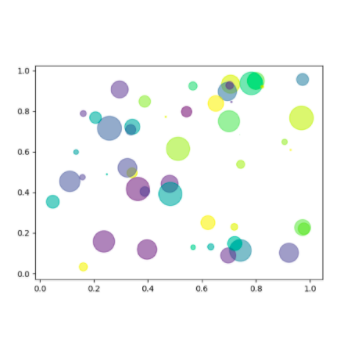

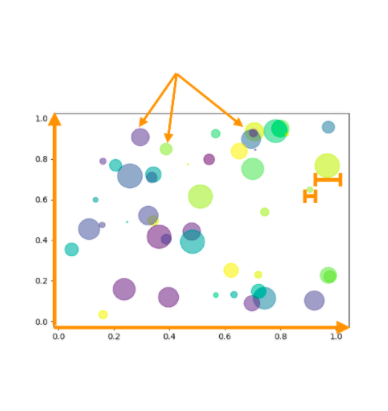

In [ ]:
#Answer: 4 variables. X, Y, Area, Color

Okay that's all we have for this week. Please feel free to reach out to us through email or attend our weekly Office Hours for questions or help on the practice problems.